<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Threshold" data-toc-modified-id="Threshold-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Threshold</a></span></li><li><span><a href="#Smote" data-toc-modified-id="Smote-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Smote</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем необходимые библиотеки, модели и метрики.

In [ ]:
pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

Изучим общую информацию о датасете.

In [2]:
df = pd.read_csv('/users/roman/git-project/Churn.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце 'Tenure' обнаружены пропуски. Пропуски могли возникнуть из-за технической ошибки, скорее всего у банка достаточно информации о том, сколько лет клиент обслуживается у них. Заполним пропуски медианным значением в зависимости от возраста клиента. Это не должно оказать негативное влияние на наше исследование, так как пропусков не много, а из вывода команды describe видно, что эта переменная распределена без заметных выбросов.

In [6]:
df['Tenure'] = df['Tenure'].fillna(df.groupby(['Age'])['Tenure'].transform('median'))
df['Tenure'] = df['Tenure'].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes.to_frame()

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


Типы значений в столбцах указаны верно, преобразование не требуется.

Проверим наличие дубликатов.

In [9]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Столбцы *'Surname', 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'* могут содержать одинаковые значения, поэтому проверим на наличие дубликатов столбец с уникальными номерами клиентов - *'CustomerId'*.

In [11]:
df['CustomerId'].duplicated().sum()

0

Дубликатов не обнаружено, можем продолжать работу с текущими данными.

Значения в столбцах *'RowNumber', 'CustomerId', 'Surname'* содержат в себе идентификационные данные о клиентах и не несут пользы для дальнейшего исследования. Удалим их.

In [12]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).copy()

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


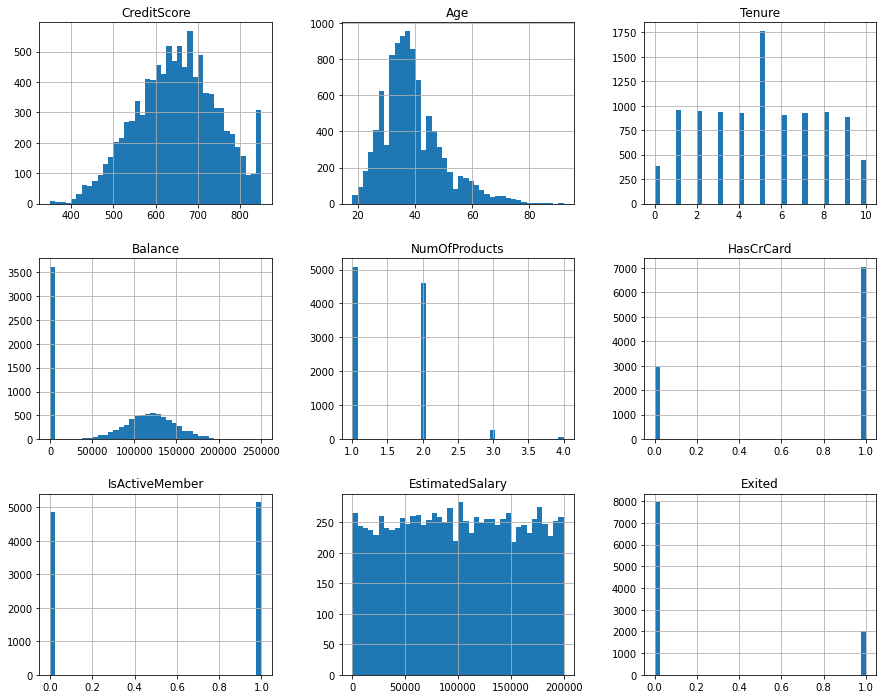

In [14]:
data.hist(bins=40, figsize=(15,12), linewidth=2)
plt.show()

Для построения и обучения моделей проверим мультиколлинеарность исследуемых признаков.

Целевой признак - *'Exited'*.

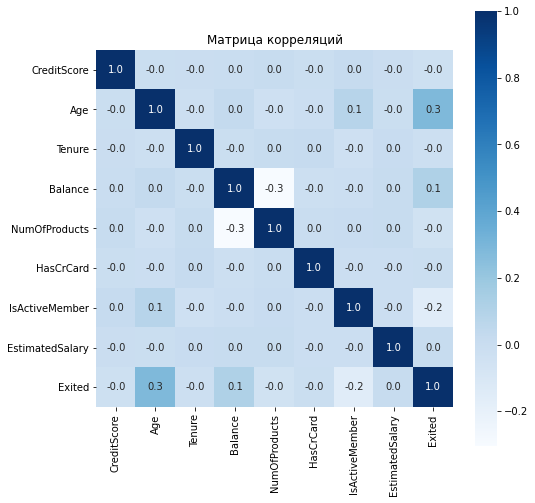

In [15]:
plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, fmt=".1f", square=True, cmap='Blues')\
.set(title='Матрица корреляций')
plt.show()

В подготовленном датасете **data**:
- пропуски устранены;
- типы данных указаны верно;
- дубликаты не обнаржены;
- неинформативные значения (столбцы) удалены;
- мультиколлинеарность не обнаружена.

## Исследование задачи

### Подготовка признаков

Прогноз ухода клиента из банка - задача классификации.

Нам необходимо использовать модель Дерева решений, Случайного леса и Логистической регрессии.

С помощью OHE приведем значения столбцов *'Geography', 'Gender'* к цифровому виду.

In [16]:
data = pd.get_dummies(data, drop_first=True)

Для корректного обучения моделей разобьем имеющиеся данные на три выборки в следующих пропорциях:
- 60% тренировочная выборка;
- 20% валидационная выборка;
- 20% тестовая выборка.

In [17]:
x = data.drop(['Exited'], axis=1).copy()
y = data['Exited'].copy()

x_train, x_val, y_train, y_val = \
train_test_split(x, y, test_size=0.4, random_state=42)

x_val, x_test, y_val, y_test = \
train_test_split(x_val, y_val, test_size=0.5, random_state=42)

print(x_train.shape,
      x_val.shape,
      x_test.shape,
      y_train.shape,
      y_val.shape,
      y_test.shape, end='')

(6000, 11) (2000, 11) (2000, 11) (6000,) (2000,) (2000,)

### Масштабирование признаков

In [18]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_val[numeric] = scaler.transform(x_val[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

Мы получили мастабированные признаки для трех подготовленных выборок.

Проверим, как представлены классы целевого признака в датасете.

In [19]:
data['Exited'].value_counts(normalize=1).to_frame()

,Exited
0,0.7963
1,0.2037


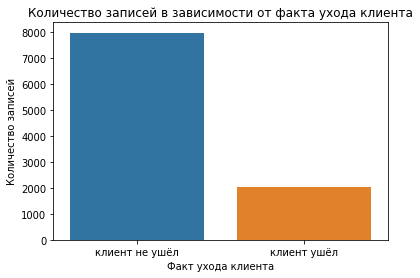

In [20]:
sns.countplot(data=df, x='Exited')\
.set(xticklabels = (['клиент не ушёл', 'клиент ушёл']))
plt.title('Количество записей в зависимости от факта ухода клиента')
plt.xlabel('Факт ухода клиента')
plt.ylabel('Количество записей')
plt.show()

Целевой признак представлен неравномерно: количество оставшихся клиентов почти в 4 (четыре) раза превышает количество ушедших клиентов.

Столь существенный дисбаланс классов может негативно отразиться на качестве работы моделей.

Построим модели без учета проблемы дисбаланса классов и проверим полученные метрики.

### Обучение моделей

#### Дерево решений

In [46]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = { 'max_depth': range (1,25,2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

Подберем оптимальные параметры модели.

In [47]:
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(x_train, y_train)
dt_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [50]:
dt_model = DecisionTreeClassifier(max_depth=9,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  random_state=42)
dt_model.fit(x_train, y_train)
dt_predict_val = dt_model.predict(x_val)
dt_f1 = f1_score(y_val, dt_predict_val)

dt_proba_val = dt_model.predict_proba(x_val)
dt_proba_one_val = dt_proba_val[:, 1]
dt_auc = roc_auc_score(y_val, dt_predict_val)

print('Значение метрики F1 для решающего дерева составляет:', f'{dt_f1:.3f}')
print('Значение метрики AUC для решающего дерева составляет:', f'{dt_auc:.3f}')

Значение метрики F1 для решающего дерева составляет: 0.514
Значение метрики AUC для решающего дерева составляет: 0.689


#### Случайный лес

In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_params = { 'n_estimators': range(20,161,20),
              'max_depth': range(1,16,2) }

Подберем оптимальные параметры модели.

In [52]:
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

{'max_depth': 11, 'n_estimators': 160}

In [26]:
rf_model = RandomForestClassifier(n_estimators=120,
                                 max_depth=11,
                                 random_state=42)
rf_model.fit(x_train, y_train)
rf_predict_val = rf_model.predict(x_val)
rf_f1 = f1_score(y_val, rf_predict_val)

rf_proba_val = rf_model.predict_proba(x_val)
rf_proba_one_val = rf_proba_val[:, 1]
rf_auc = roc_auc_score(y_val, rf_predict_val)

print('Значение метрики F1 для случайного леса составляет:', f'{rf_f1:.3f}')
print('Значение метрики AUC для случайного леса составляет:', f'{rf_auc:.3f}')

Значение метрики F1 для случайного леса составляет: 0.541
Значение метрики AUC для случайного леса составляет: 0.694


#### Логистическая регрессия

In [27]:
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(x_train, y_train)
lr_predict_val = lr_model.predict(x_val)
lr_f1 = f1_score(y_val, lr_predict_val)

lr_proba_val = lr_model.predict_proba(x_val)
lr_proba_one_val = lr_proba_val[:, 1]
lr_auc = roc_auc_score(y_val, lr_predict_val)

print('Значение метрики F1 для логистической регрессии составляет:', f'{lr_f1:.3f}')
print('Значение метрики AUC для логистической регрессии составляет:', f'{lr_auc:.3f}')

Значение метрики F1 для логистической регрессии составляет: 0.296
Значение метрики AUC для логистической регрессии составляет: 0.582


Низкие значения метрик всех моделей могут быть следствием проблемы дисбаланса классов.

Проверим качество работы моделей с учетом гиперпараметра *class_weight='balanced'*.

In [28]:
dt_model = DecisionTreeClassifier(max_depth=7,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  class_weight='balanced',
                                  random_state=42)
dt_model.fit(x_train, y_train)
dt_predict_val = dt_model.predict(x_val)
dt_f1 = f1_score(y_val, dt_predict_val)
dt_proba_val = dt_model.predict_proba(x_val)
dt_proba_one_val = dt_proba_val[:, 1]
dt_auc = roc_auc_score(y_val, dt_predict_val)

print('Значение метрики F1 для решающего дерева составляет:', f'{dt_f1:.3f}')
print('Значение метрики AUC для решающего дерева составляет:', f'{dt_auc:.3f}')
print()

rf_model = RandomForestClassifier(n_estimators=120,
                                  max_depth=11,
                                  class_weight='balanced',
                                  random_state=42)
rf_model.fit(x_train, y_train)
rf_predict_val = rf_model.predict(x_val)
rf_f1 = f1_score(y_val, rf_predict_val)
rf_proba_val = rf_model.predict_proba(x_val)
rf_proba_one_val = rf_proba_val[:, 1]
rf_auc = roc_auc_score(y_val, rf_predict_val)

print('Значение метрики F1 для случайного леса составляет:', f'{rf_f1:.3f}')
print('Значение метрики AUC для случайного леса составляет:', f'{rf_auc:.3f}')
print()

lr_model = LogisticRegression(solver='liblinear',
                              class_weight='balanced',
                              random_state=42)
lr_model.fit(x_train, y_train)
lr_predict_val = lr_model.predict(x_val)
lr_f1 = f1_score(y_val, lr_predict_val)
lr_proba_val = lr_model.predict_proba(x_val)
lr_proba_one_val = lr_proba_val[:, 1]
lr_auc = roc_auc_score(y_val, lr_predict_val)

print('Значение метрики F1 для логистической регрессии составляет:', f'{lr_f1:.3f}')
print('Значение метрики AUC для логистической регрессии составляет:', f'{lr_auc:.3f}')
print()

Значение метрики F1 для решающего дерева составляет: 0.552
Значение метрики AUC для решающего дерева составляет: 0.743

Значение метрики F1 для случайного леса составляет: 0.577
Значение метрики AUC для случайного леса составляет: 0.735

Значение метрики F1 для логистической регрессии составляет: 0.461
Значение метрики AUC для логистической регрессии составляет: 0.692



Качество всех трех моделей улучшилось, что еще раз подтверждает нашу гипотезу о наличии проблемы дисбаланса классов.

Для удобста дальнейшего анализа создадим функцию *get_scores*, автоматизирующую получение метрик для моделей.

In [29]:
def get_scores(x_trn, y_trn):
    #DecisionTree
    dt_model = DecisionTreeClassifier(max_depth=7,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  class_weight='balanced',
                                  random_state=42)
    dt_model.fit(x_trn, y_trn)
    dt_f1 = cross_val_score(dt_model, 
                            x_trn, y_trn,
                            n_jobs=-1, 
                            scoring='f1')
    dt_auc = cross_val_score(lr_model, 
                             x_trn, y_trn,
                             n_jobs=-1, 
                             scoring='roc_auc')
    print('Дерево решений')
    print('Метрика F1:', f'{dt_f1.mean():.3f}')
    print('Метрика AUC:', f'{dt_auc.mean():.3f}')
    print()
    
    #RandomForest
    rf = RandomForestClassifier(n_estimators=125,
                                max_depth=11,
                                class_weight='balanced',
                                random_state=42,
                                n_jobs=-1)    
    rf_model.fit(x_trn, y_trn)
    rf_f1 = cross_val_score(rf_model, 
                            x_trn, y_trn,
                            n_jobs=-1, 
                            scoring='f1')
    rf_auc = cross_val_score(rf_model, 
                             x_trn, y_trn,
                             n_jobs=-1, 
                             scoring='roc_auc')
    print('Случайный лес')
    print('Метрика F1:', f'{rf_f1.mean():.3f}')
    print('Метрика AUC:', f'{rf_auc.mean():.3f}')
    print()
    
    #LogisticRegression
    lr = LogisticRegression(solver='liblinear',
                            class_weight='balanced',
                            random_state=42,
                            n_jobs=-1)
    lr_model.fit(x_trn, y_trn)
    lr_f1 = cross_val_score(lr_model, 
                            x_trn, y_trn,
                            n_jobs=-1, 
                            scoring='f1')
    lr_auc = cross_val_score(lr_model, 
                             x_trn, y_trn,
                             n_jobs=-1, 
                             scoring='roc_auc')
    
    print('Логистическая регрессия')
    print('Метрика F1:', f'{lr_f1.mean():.3f}')
    print('Метрика AUC:', f'{lr_auc.mean():.3f}')
    print()

In [30]:
get_scores(x_train, y_train)

Дерево решений
Метрика F1: 0.552
Метрика AUC: 0.768

Случайный лес
Метрика F1: 0.613
Метрика AUC: 0.859

Логистическая регрессия
Метрика F1: 0.497
Метрика AUC: 0.768



Мы наблюдаем изменение метрик каждой модели при использовании гиперпараметра *class_weight = 'balanced'* и кросс-валидации.

Необходимо решить проблему дисбаланса классов.

## Борьба с дисбалансом

Ранее мы выявили проблему существенного дисбаланса классов. Решим ее следующими методами:

- Upsampling
- Downsampling
- Threshold
- Smote

### Upsampling

Увеличим количество признака "клиент ушел" до размера признака "клиент не ушел". Как мы выяснили ранее, количество оставшихся клиентов почти в 4 (четыре) раза превышает количество ушедших клиентов.

In [31]:
def upsample(x, y, repeat):
    x_train_zeros = x_train[y_train == 0]
    x_train_ones = x_train[y_train == 1]
    y_train_zeros = y_train[y_train == 0]
    y_train_ones = y_train[y_train == 1]

    x_upsampled = pd.concat([x_train_zeros] + [x_train_ones] * repeat)
    y_upsampled = pd.concat([y_train_zeros] + [y_train_ones] * repeat)
    
    x_upsampled, y_upsampled = shuffle(x_upsampled,
                                       y_upsampled,
                                       random_state=42)
    
    return x_upsampled, y_upsampled

In [32]:
x_upsampled, y_upsampled = upsample(x_train, y_train, 4)

print('Количество оставшихся клиентов:', y_upsampled[y_upsampled == 0].size)
print('Количество ушедших клиентов:', y_upsampled[y_upsampled == 1].size)

Количество оставшихся клиентов: 4773
Количество ушедших клиентов: 4908


In [33]:
get_scores(x_upsampled, y_upsampled)

Дерево решений
Метрика F1: 0.789
Метрика AUC: 0.770

Случайный лес
Метрика F1: 0.900
Метрика AUC: 0.963

Логистическая регрессия
Метрика F1: 0.707
Метрика AUC: 0.770



Модели на кросс-валидации показывают очень высокие метрики. Это связано с самой методикой расширения: мы многократно скопировали данные клиентов, которые ушли из банка. На этапе кросс-валидации копии этих данных попадают и в учебную, и в валидационную выборки - итоговые метрики получаются завышенными.

### Downsampling

Уменьшим количество признака "клиент не ушел" до размере признака "клиент ушел".

In [34]:
def downsample(x, y, repeat):
    x_train_zeros = x_train[y_train == 0]
    x_train_ones = x_train[y_train == 1]
    y_train_zeros = y_train[y_train == 0]
    y_train_ones = y_train[y_train == 1]

    x_downsampled = pd.concat([x_train_zeros.sample(n=y_train_ones.size), x_train_ones])
    y_downsampled = pd.concat([y_train_zeros.sample(n=y_train_ones.size), y_train_ones])
    
    x_downsampled, y_downsampled = shuffle(x_downsampled,
                                       y_downsampled,
                                       random_state=42)
    
    return x_downsampled, y_downsampled

In [35]:
x_downsampled, y_downsampled = downsample(x_train, y_train, 4)

print('Количество оставшихся клиентов:', y_downsampled[y_downsampled == 0].size)
print('Количество ушедших клиентов:', y_downsampled[y_downsampled == 1].size)

Количество оставшихся клиентов: 1227
Количество ушедших клиентов: 1227


In [36]:
get_scores(x_downsampled, y_downsampled)

Дерево решений
Метрика F1: 0.750
Метрика AUC: 0.765

Случайный лес
Метрика F1: 0.773
Метрика AUC: 0.855

Логистическая регрессия
Метрика F1: 0.703
Метрика AUC: 0.765



В сравнении с методом Upsampling мы видим снижение метрик.

### Threshold

Изменим значение порога вероятности классов.

In [37]:
best_lr_threshold = 0
best_lr_f1 = 0
lr_model = LogisticRegression(solver='liblinear',
                              class_weight='balanced',
                              random_state=42)
lr_model.fit(x_train, y_train)
proba_lr_valid = lr_model.predict_proba(x_val)
proba_lr_one_val = proba_lr_valid[:,1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_lr_valid = proba_lr_one_val > threshold
    lr_f1 = f1_score(y_val, predicted_lr_valid)
    if lr_f1 > best_lr_f1:
        best_lr_f1 = lr_f1
        best_lr_threshold = threshold
print('Логистическая регрессия')    
print('Threshold = {:.3f} | F1 = {:.3f}'.format(best_lr_threshold, best_lr_f1))
print()

best_dt_threshold = 0
best_dt_f1 = 0
dt_model = DecisionTreeClassifier(max_depth=7,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  class_weight='balanced',
                                  random_state=42)
dt_model.fit(x_train, y_train)
proba_dt_valid = dt_model.predict_proba(x_val)
proba_dt_one_val = proba_dt_valid[:,1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_dt_valid = proba_dt_one_val > threshold
    dt_f1 = f1_score(y_val, predicted_dt_valid)
    if dt_f1 > best_dt_f1:
        best_dt_f1 = dt_f1
        best_dt_threshold = threshold
print('Дерево решений')
print('Threshold = {:.3f} | F1 = {:.3f}'.format(best_dt_threshold, best_dt_f1))
print()

best_rf_threshold = 0
best_rf_f1 = 0
rf_model = RandomForestClassifier(n_estimators=125,
                                  max_depth=11,
                                  class_weight='balanced',
                                  random_state=42)
rf_model.fit(x_train, y_train)
proba_rf_valid = rf_model.predict_proba(x_val)
proba_rf_one_val = proba_rf_valid[:,1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_rf_valid = proba_rf_one_val > threshold
    rf_f1 = f1_score(y_val, predicted_dt_valid)
    if rf_f1 > best_rf_f1:
        best_rf_f1 = rf_f1
        best_rf_threshold = threshold
print('Случайный лес')
print('Threshold = {:.3f} | F1 = {:.3f}'.format(best_rf_threshold, best_rf_f1))
print()

Логистическая регрессия
Threshold = 0.550 | F1 = 0.466

Дерево решений
Threshold = 0.600 | F1 = 0.556

Случайный лес
Threshold = 0.000 | F1 = 0.425



Мы видим ухудшение метрик по каждой модели.

### Smote

In [38]:
sm = SMOTE(random_state=42)

In [39]:
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [40]:
get_scores(x_sm, y_sm)

Дерево решений
Метрика F1: 0.791
Метрика AUC: 0.799

Случайный лес
Метрика F1: 0.864
Метрика AUC: 0.940

Логистическая регрессия
Метрика F1: 0.725
Метрика AUC: 0.799



Использование метода Smote позволило нам добиться высоких значений метрик. 

На каждом этапе борьбы с дисбалансом классов метрики модели Случайный лес оказывались самыми высокими.

Принимая во внимание недостатки метода Upsampling, для дальнейшего тестирования модели будем использовать данные, полученные методом Smote.

Для финального тестирования модели на тестовой выборке подберем оптимальные параметры.

In [41]:
rf_test_model = RandomForestClassifier(random_state=42)
rf_test_params = { 'n_estimators': range(20,121,20),
              'max_depth': range(1,16,2) }

In [42]:
rf_test_grid = GridSearchCV(rf_test_model, rf_test_params, cv=5)
rf_test_grid.fit(x_sm, y_sm)
rf_test_grid.best_params_

{'max_depth': 15, 'n_estimators': 100}

## Тестирование модели

Проверим работу модели на тестовой выборке с учетом оптимальных гиперпараметров.

In [43]:
rf_test_model = RandomForestClassifier(n_estimators=100,
                                 max_depth=15,
                                 random_state=42)
rf_test_model.fit(x_sm, y_sm)
rf_predict_test = rf_test_model.predict(x_test)
rf_f1 = f1_score(y_test, rf_predict_test)
rf_recall = recall_score(y_test, rf_predict_test)
rf_precision = precision_score(y_test, rf_predict_test)

rf_test_proba_val = rf_test_model.predict_proba(x_test)
rf_test_proba_one_val = rf_test_proba_val[:, 1]
rf_auc = roc_auc_score(y_test, rf_test_proba_one_val)

print('Случайный лес')
print('F1:', f'{rf_f1:.2f}')
print('Recall:', f'{rf_recall:.2f}')
print('Precision:', f'{rf_precision:.2f}')
print('AUC:', f'{rf_auc:.2f}')

Случайный лес
F1: 0.61
Recall: 0.63
Precision: 0.59
AUC: 0.85


Используя модель Случайный лес, обученную с применением метода Smote, нам удалось достичь значения метрики **F1 = 0.61**, что превышает целевой показатель 0.59.

In [44]:
pd.Series(data=rf_test_model.feature_importances_,
          index=x_sm.columns,
          name='feature_importance').sort_values(ascending=False).head().to_frame()

,feature_importance
Age,0.269065
NumOfProducts,0.141658
Balance,0.130150
EstimatedSalary,0.108081
CreditScore,0.099421


Наиболее важными признаками для используемой модели оказались:
- возраст
- количество используемых продуктов
- баланс

Убедимся, что наша модель действительно позволяет получить ценные прогнозы. Для этого сравним метрики модели на основе случайного леса с метриками модели, которая всегда предсказывает наиболее часто встречающийся класс (0, клиент не ушел).

In [45]:
#from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='prior', random_state=42)
dummy.fit(x_sm, y_sm)
dummy_pred = dummy.predict(x_test)
dummy_f1 = f1_score(y_test, dummy_pred)
dummy_recall = recall_score(y_test, dummy_pred)
dummy_precision = precision_score(y_test, dummy_pred)
dummy_proba_val = dummy.predict_proba(x_test)
dummy_proba_one_val = dummy_proba_val[:, 1]
dummy_auc = roc_auc_score(y_test, dummy_proba_one_val)

print('Dummy F1:', f'{dummy_f1:.2f}')
print('Dummy Recall:', f'{dummy_recall:.2f}')
print('Dummy Precision:', f'{dummy_precision:.2f}')
print('Dummy AUC:', f'{dummy_auc:.2f}')

Dummy F1: 0.00
Dummy Recall: 0.00
Dummy Precision: 0.00
Dummy AUC: 0.50


Все метрики нашей модели превосходят метрики случайного выбора величины.

Значит, обученная нами модель работает адекватно и позволяет спрогнозировать возможное поведение клиентов.

## Общий вывод

**Задача:** прогноз оттока клиентов банка на основе имеющихся данных.

В рамках исследовательского анализа данных был выялен ряд несущественных проблем, которые были успешно решены.

Затем были созданы три модели, которые последовательно обучались с различными наборами данных, созданными на основе исходной таблицы. Оценка эффективности моделей производилась по метрикам F1 и ROC AUC.

Наилучшего значения метрики удаётся достичь для отмасштабированного и сбалансированного набора данных. Итоговая метрика F1 наилучшей модели на тестовых данных равна **0,61**.

Адекватность прогноза модели была показана путём сравнения с классификатором случайного выбора величины признака.

Полученная модель может быть использована как при разработке маркетинговых стратегий, изучении клиентской базы, так и для целенаправленой работы с клиентами, которые могут уйти из банка.